# 📘 Notebook 04 – Sequence Modeling Analysis
# 🎯 Objective: Compare the performance of CatBoost with Logistic Regression and XGBoost models, and analyze feature importance using SHAP.


In [3]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.metrics import classification_report, roc_auc_score
import shap
from google.cloud import storage
import matplotlib.pyplot as plt


In [4]:
from google.colab import auth

auth.authenticate_user()

✅ Downloaded CatBoost model from GCS: ../models/catboost_model.cbm
✅ Downloaded cleaned dataset: ../data/session_features_clean.csv
ROC-AUC for CatBoost: 1.0


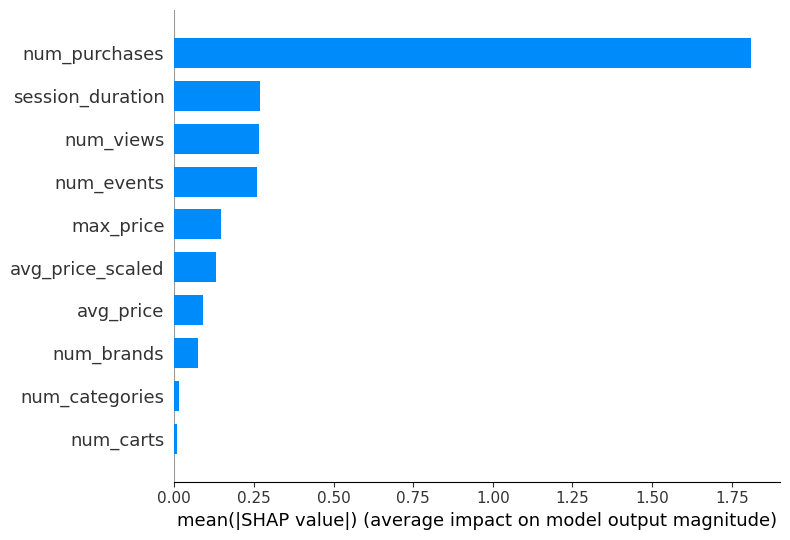

✅ SHAP summary plot saved.
✅ Model comparison saved.
✅ Uploaded model comparison to GCS.


<Figure size 640x480 with 0 Axes>

In [6]:

# ⬇️ Download best model (CatBoost) from GCS
gcs_path = "clickstream/models/catboost_model.cbm"
local_model_path = "../models/catboost_model.cbm"
os.makedirs("../models", exist_ok=True)

client = storage.Client()
bucket = client.bucket("boothill2001-dataset")
blob = bucket.blob(gcs_path)
blob.download_to_filename(local_model_path)
print(f"✅ Downloaded CatBoost model from GCS: {local_model_path}")

# ⬇️ Download cleaned dataset from GCS
dataset_gcs_path = "clickstream/session_features_clean.csv"
dataset_local_path = "../data/session_features_clean.csv"
os.makedirs("../data", exist_ok=True)
blob = bucket.blob(dataset_gcs_path)
blob.download_to_filename(dataset_local_path)
print(f"✅ Downloaded cleaned dataset: {dataset_local_path}")

# Load data
df = pd.read_csv(dataset_local_path)
X = df.drop(columns=["user_session", "conversion"])
y = df["conversion"]

# Load CatBoost model
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.load_model(local_model_path)

# Predict and evaluate
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_prob)
print(f"ROC-AUC for CatBoost: {roc_auc}")

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
os.makedirs("../outputs", exist_ok=True)
shap.summary_plot(shap_values, X, plot_type="bar")
plt.savefig("../outputs/shap_summary_plot.png")
print("✅ SHAP summary plot saved.")

# Save model comparison result
results = {"model": "CatBoost", "roc_auc": roc_auc}
with open("../outputs/sequence_model_comparison.json", "w") as f:
    json.dump(results, f, indent=2)
print("✅ Model comparison saved.")

# Upload to GCS
blob = bucket.blob("clickstream/outputs/sequence_model_comparison.json")
blob.upload_from_filename("../outputs/sequence_model_comparison.json")
print("✅ Uploaded model comparison to GCS.")


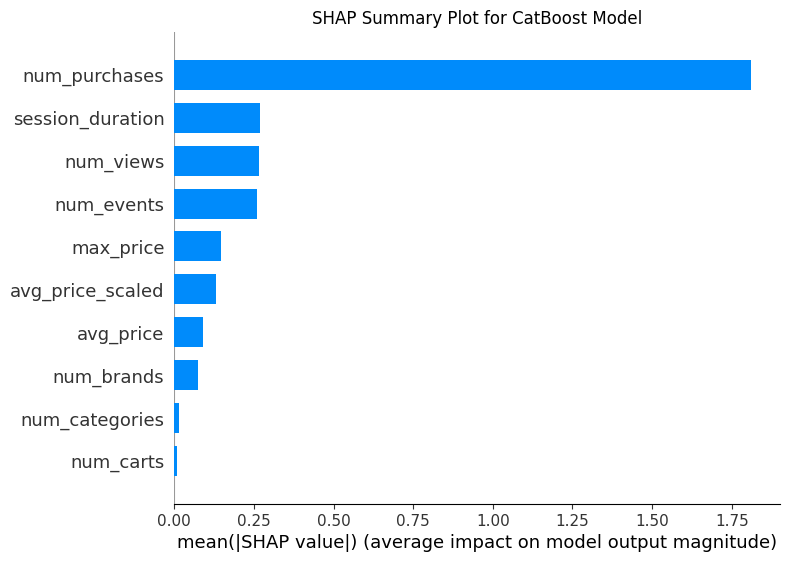

✅ SHAP summary plot saved.


<Figure size 640x480 with 0 Axes>

In [7]:
# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Summary Plot for CatBoost Model")
plt.savefig("../outputs/shap_summary_plot.png", bbox_inches='tight')
plt.show()
plt.savefig("../outputs/shap_summary_plot.png")
print("✅ SHAP summary plot saved.")

In [7]:
!pip install --upgrade numpy catboost shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.6/972.6 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.47.0
    Uninstalling shap-0.47.0:
      Successfully uninstalled shap-0.47.0


In [1]:
import numpy as np
import catboost
print(f"NumPy version: {np.__version__}")
print(f"CatBoost version: {catboost.__version__}")


NumPy version: 1.26.4
CatBoost version: 1.2.7
